In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [346]:
bike_dataset = pd.read_csv('Bike Price Dataset.csv')

In [347]:
bike_dataset.head() 

,Brand_Name,Model_Name,Brand_Origin,CC,Milage,Top_Speed,Category,Price
0,BAJAJ,Glamour,India,124.7,81.1,90.0,Adventure,114490
1,BAJAJ,HF Deluxe Self,India,97.2,82.9,85.0,Adventure,94490
2,BAJAJ,Passion Xpro Disc,India,109.1,85.6,87.0,Adventure,106490
3,BAJAJ,Xtreme Sports Single Disc,India,149.2,65.1,107.0,Adventure,174900
4,BAJAJ,Ignitor,India,124.7,55.0,102.0,Air-Cooled,121490


In [348]:
print(bike_dataset.Brand_Name.value_counts())
print(bike_dataset.Brand_Origin.value_counts())
print(bike_dataset.Category.value_counts())

RUNNER      36
HONDA       34
BAJAJ       32
HERO        30
H Power     30
YAMAHA      26
TVS         20
Mahindra    17
SUZUKI      16
Keeway      13
BMW         12
Walton      12
LIFAN       11
APRILIA     11
TVS\n        1
Name: Brand_Name, dtype: int64
India         119
Japan          67
Bangladesh     58
China          34
Germany        12
Italy‎         11
Name: Brand_Origin, dtype: int64
Standard          72
Roadstar          64
Naked             63
Sport             42
Scooter           23
Street Bike       12
Air-Cooled         7
Cruiser            7
Adventure          4
Heritage           3
Off Road           2
Commuter           1
Urban Mobility     1
Name: Category, dtype: int64


# **Encription**

In [349]:
bike_dataset.replace({'Brand_Name':{'HONDA':0,'BAJAJ':1,'H Power':2,'HERO':3,'YAMAHA':4,'RUNNER':5,'TVS':6,'TVS\n':6,'SUZUKI':7,'Mahindra':8,
                                    'Keeway':9,'Walton':10,'BMW':11,'APRILIA':12,'LIFAN':13}},inplace=True)
bike_dataset.replace({'Brand_Origin':{'India':0,'Japan':1,'Bangladesh':2,'China':3,'Germany':4,'Italy‎':5}},inplace=True)
bike_dataset.replace({'Category':{'Standard':0,'Sport':1,'Scooter':2,'Street Bike':3,'Air-Cooled':4,'Cruiser':5,
                                  'Adventure':6,'Heritage':7,'Off Road':8,'Commuter':9,'Urban Mobility':10,'Naked':11,'Roadstar':12}},inplace=True)

In [350]:
bike_dataset

,Brand_Name,Model_Name,Brand_Origin,CC,Milage,Top_Speed,Category,Price
0,1,Glamour,0,124.7,81.1,90.0,6,114490
1,1,HF Deluxe Self,0,97.2,82.9,85.0,6,94490
2,1,Passion Xpro Disc,0,109.1,85.6,87.0,6,106490
3,1,Xtreme Sports Single Disc,0,149.2,65.1,107.0,6,174900
4,1,Ignitor,0,124.7,55.0,102.0,4,121490
...,...,...,...,...,...,...,...,...
296,10,Fusion 110,2,107.0,45.0,90.0,3,100000
297,10,Cruize,2,97.0,45.0,80.0,3,81000
298,10,Stylex Plus,2,97.0,70.0,80.0,3,85000
299,10,Stylex,2,98.0,45.0,80.0,3,65550


In [351]:
# X = bike_dataset.drop(['Model_Name','Price'],axis=1)
# Y = bike_dataset['Price']

In [352]:
# print(X)

In [353]:
# print(Y)

# **Normalization**

In [354]:
# feature_columns = ['Brand_Name', 'Brand_Origin', 'CC', 'Milage' , 'Top_Speed', 'Category']
# test = bike_dataset
# target_price = pd.DataFrame(test['Price'])
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
# feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
# feature_minmax_transform.head()

In [355]:
# X_train, X_test, Y_train, Y_test = train_test_split(feature_minmax_transform_data, target_price, test_size = 0.3, random_state=2)
# X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

In [356]:
X = bike_dataset.iloc[:,[0,2,3,4,5,6]]
Y = bike_dataset.iloc[:,[7]]
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)


In [357]:
scaler = MinMaxScaler().fit(x_train)
X_train = scaler.transform(x_train)
scaler = MinMaxScaler().fit(x_test)
X_test = scaler.transform(x_test)

# **Linear Regression**

In [358]:
lin_reg_model = LinearRegression()

In [359]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [360]:
training_data_prediction = lin_reg_model.predict(X_train)

In [361]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  103189.73376236022
Mean Absolute Error:  265.543373134415
Mean Squared Error:  10648121153.946785
R2 score:  0.9085288387826236


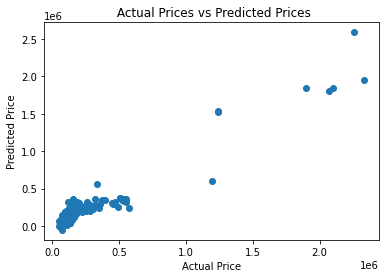

In [362]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [363]:
test_data_prediction = lin_reg_model.predict(X_test)

In [364]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  284011.9614436008
Mean Absolute Error:  325.4567374257231
Mean Squared Error:  80662794243.0414
R2 score:  0.7002364564097889


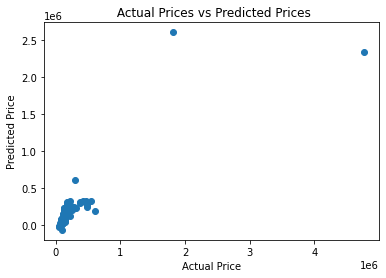

In [365]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# **Lasso Regression**

In [366]:
lass_reg_model = Lasso()

In [367]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [368]:
training_data_prediction = lass_reg_model.predict(X_train)

In [369]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  103189.73483725604
Mean Absolute Error:  265.5413691324818
Mean Squared Error:  10648121375.78321
R2 score:  0.9085288368769695


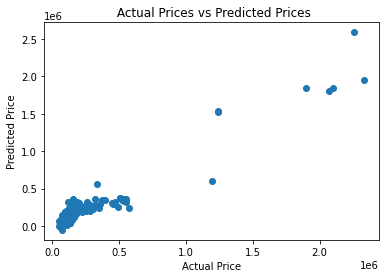

In [370]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [371]:
test_data_prediction = lass_reg_model.predict(X_test)

In [372]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  284014.9562050444
Mean Absolute Error:  325.4563962820666
Mean Squared Error:  80664495348.15329
R2 score:  0.7002301346687541


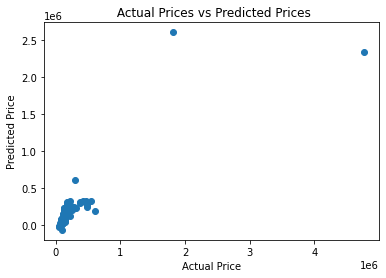

In [373]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# **Extreme Gradient Boosting**

In [374]:
model = XGBRegressor()

In [375]:
model.fit(X_train, Y_train)

[15:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [376]:
training_data_prediction = model.predict(X_train)

In [377]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  29803.682678875535
Mean Absolute Error:  142.26445601916373
Mean Squared Error:  888259501.2231055
R2 score:  0.9923695338487833


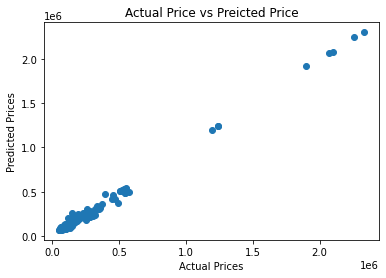

In [378]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [379]:
test_data_prediction = model.predict(X_test)

In [380]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  289541.75200909027
Mean Absolute Error:  287.0640133626247
Mean Squared Error:  83834426156.49352
R2 score:  0.6884498622276487


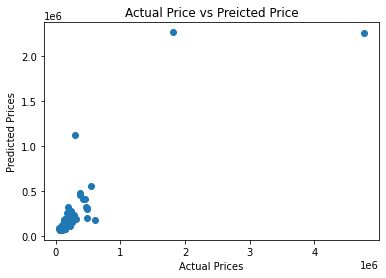

In [381]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# **Support Vector Machine**

In [382]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(X_train, Y_train)
training_data_prediction = svr_lin.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [383]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  355111.10766924964
Mean Absolute Error:  366.2351830421821
Mean Squared Error:  126103898790.08142
R2 score:  -0.08327749934473583


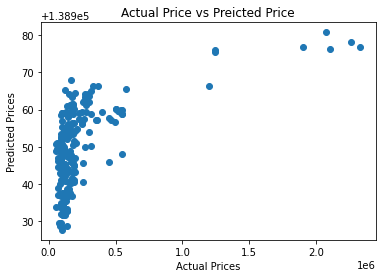

In [384]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [385]:
test_data_prediction = model.predict(X_test)

In [386]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  289541.75200909027
Mean Absolute Error:  287.0640133626247
Mean Squared Error:  83834426156.49352
R2 score:  0.6884498622276487


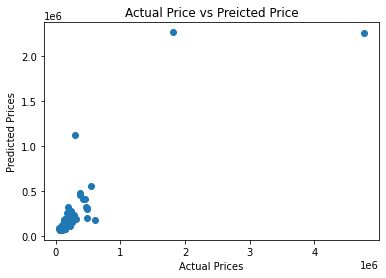

In [387]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# **Bayesian regression**

In [388]:
bay = linear_model.BayesianRidge()
bay.fit(X_train, Y_train)
training_data_prediction = bay.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [389]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  341188.508749054
Mean Absolute Error:  411.89334179444205
Mean Squared Error:  116409598502.4033
R2 score:  1.9565815634337014e-10


In [390]:
test_data_prediction = model.predict(X_test)

In [391]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  289541.75200909027
Mean Absolute Error:  287.0640133626247
Mean Squared Error:  83834426156.49352
R2 score:  0.6884498622276487


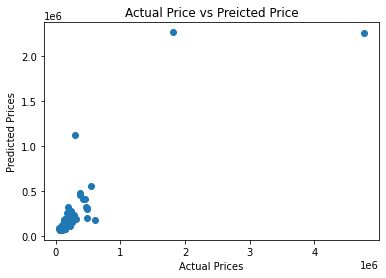

In [392]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# **Ada Boost**

In [393]:
from sklearn.ensemble import AdaBoostRegressor

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(X_train, Y_train)
training_data_prediction = Ada_Boost.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [394]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_train, training_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_train, training_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 score: ', R2_score)

RMSE:  60482.63289238469
Mean Absolute Error:  222.473519508459
Mean Squared Error:  3658148881.594974
R2 score:  0.9685751954483057


In [395]:
test_data_prediction = lin_reg_model.predict(X_test)

In [396]:
RSME_score = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('RMSE: ', RSME_score)

MAE_score = np.sqrt(metrics.mean_absolute_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', MAE_score)


MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error: ', MSE_score)


R2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score: ', R2_score)

RMSE:  284011.9614436008
Mean Absolute Error:  325.4567374257231
Mean Squared Error:  80662794243.0414
R2 score:  0.7002364564097889


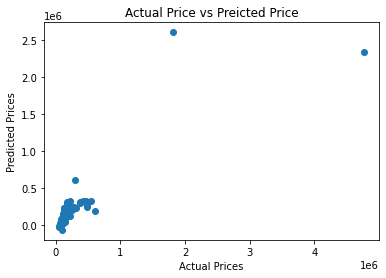

In [397]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()